## We are scraping the coordinates of sectors from google search.

- change the code according to the sector number.
- sector number is from 1 to 115.
- we are scraping the coordinates of sectors from google search.

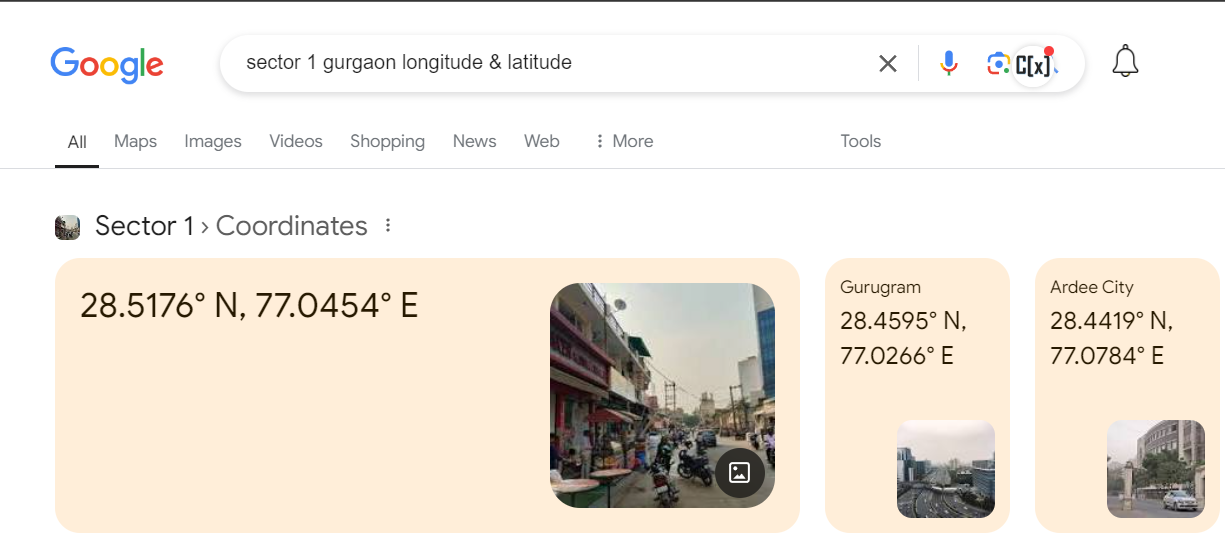

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Base URL for Google Search
BASE_URL = "https://www.google.com/search?q="

# Headers to simulate a real browser visit
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Function to scrape latitude and longitude
def get_coordinates(sector):
    search_term = f"sector {sector} gurgaon longitude & latitude"
    response = requests.get(BASE_URL + search_term, headers=HEADERS)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        coordinates_div = soup.find("div", class_="Z0LCW t2b5Cf")
        if coordinates_div:
            return coordinates_div.text
    return None

# Create a DataFrame
df = pd.DataFrame(columns=["Sector", "Coordinates"])

# Iterate over sectors and fetch coordinates
for sector in range(1, 116):
    coordinates = get_coordinates(sector)
    df = df.append({"Sector": f"Sector {sector}", "Coordinates": coordinates}, ignore_index=True)

# Save DataFrame to CSV
df.to_csv("sector_locations.csv", index=False)
